# Introduction

This article uses regression algorithms to estimate parameters based on the Kaggle dataset of Amazon’s Top 50 Best SellingBooks, with a specific URL of https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019. A mathematical model has been derived between Amazon’s annual sales volume, price, and book ratings. Based on this mathematical model, a pricing strategy can be identified to increase Amazon’s profits. Amazon can adjust book prices according to this model, which can increase the company’s annual sales volume. This price decision-making mechanism can be automatically completed by computers, thus not increasing Amazon’s labor costs and increasing its existing profits.

# Data Importation and Cleaning

The data analysis tool I used is Python3. Firstly, I imported the data into Jupyter Notebook and conducted simple cleaning and preliminary analysis.

In [1]:
#Importing the 'pandas' package and loading the data
import pandas as pd
df = pd.read_csv('../input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv')
print(df)

                                                  Name  \
0                        10-Day Green Smoothie Cleanse   
1                                    11/22/63: A Novel   
2              12 Rules for Life: An Antidote to Chaos   
3                               1984 (Signet Classics)   
4    5,000 Awesome Facts (About Everything!) (Natio...   
..                                                 ...   
545       Wrecking Ball (Diary of a Wimpy Kid Book 14)   
546  You Are a Badass: How to Stop Doubting Your Gr...   
547  You Are a Badass: How to Stop Doubting Your Gr...   
548  You Are a Badass: How to Stop Doubting Your Gr...   
549  You Are a Badass: How to Stop Doubting Your Gr...   

                       Author  User Rating  Reviews  Price  Year        Genre  
0                    JJ Smith          4.7    17350      8  2016  Non Fiction  
1                Stephen King          4.6     2052     22  2011      Fiction  
2          Jordan B. Peterson          4.7    18979     15  201

In [2]:
#clean the data and remove duplicate entries.
df.drop_duplicates(inplace=True)


In [3]:
#Descriptive statistical analysis
statistics = df.describe()
print(statistics)

       User Rating       Reviews       Price         Year
count   550.000000    550.000000  550.000000   550.000000
mean      4.618364  11953.281818   13.100000  2014.000000
std       0.226980  11731.132017   10.842262     3.165156
min       3.300000     37.000000    0.000000  2009.000000
25%       4.500000   4058.000000    7.000000  2011.000000
50%       4.700000   8580.000000   11.000000  2014.000000
75%       4.800000  17253.250000   16.000000  2017.000000
max       4.900000  87841.000000  105.000000  2019.000000


In [4]:
#Since the Reviews data represents the cumulative total over the years, the average annual Reviews data is calculated as a proxy variable for annual sales volume. 
item_counts = df['Name'].value_counts()
df['Item_count'] = df['Name'].map(item_counts)
df['AverageReviews'] =df['Reviews'] / df['Item_count']
print(df)


                                                  Name  \
0                        10-Day Green Smoothie Cleanse   
1                                    11/22/63: A Novel   
2              12 Rules for Life: An Antidote to Chaos   
3                               1984 (Signet Classics)   
4    5,000 Awesome Facts (About Everything!) (Natio...   
..                                                 ...   
545       Wrecking Ball (Diary of a Wimpy Kid Book 14)   
546  You Are a Badass: How to Stop Doubting Your Gr...   
547  You Are a Badass: How to Stop Doubting Your Gr...   
548  You Are a Badass: How to Stop Doubting Your Gr...   
549  You Are a Badass: How to Stop Doubting Your Gr...   

                       Author  User Rating  Reviews  Price  Year        Genre  \
0                    JJ Smith          4.7    17350      8  2016  Non Fiction   
1                Stephen King          4.6     2052     22  2011      Fiction   
2          Jordan B. Peterson          4.7    18979     15  

In [5]:
#Split the data frame into two separate data frames for fiction and non-fiction books, and conduct separate analyses for each
df_Fiction = df[df['Genre'] == 'Fiction']
df_non = df[df['Genre'] == 'Non Fiction']

# Data Visualization

Data visualization can help us discover relationships between these data, thereby facilitating the next step of mathematical modeling.

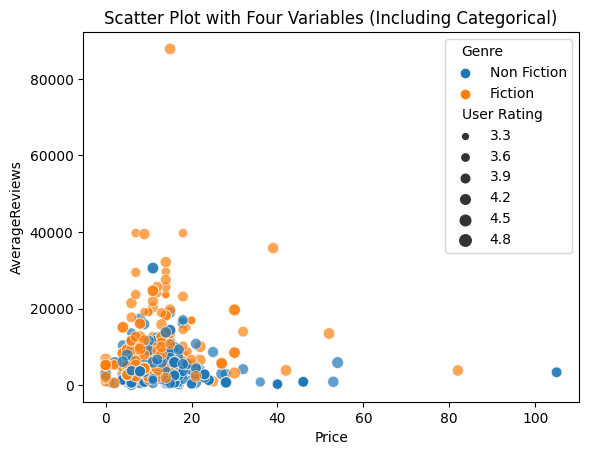

In [6]:
#Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x=df['Price'], y=df['AverageReviews'], size=df['User Rating'], hue=df['Genre'], data=df, alpha=0.7)
plt.xlabel('Price')
plt.ylabel('AverageReviews')
plt.title('Scatter Plot with Four Variables (Including Categorical)')
plt.show()

Since the dataset does not include sales volume data, we can only use Reviews as a proxy for book sales (these two data shouldbe highly correlated. Of course, if sales volume data can be obtained, the model parameters can be estimated more accurately).Based on our previous calculations, AverageReviews represents the average annual Reviews, and thus can also serve as a proxyvariable for annual book sales. The graph shows some differences between fiction and non-fiction books. Some fiction books with low ratings still have high sales volumes, indicating that fiction readers are more emotional and do not fully rely on ratings when purchasing. This reflects the Chinese saying, “there is no first in literature.” On the other hand, non-fiction readers are more rational, and as ratings increase, so does the AverageReviews, indicating that sales volume should also increase. For non-fictionbooks, increasing prices regardless of rating leads to a decrease in AverageReviews (annual sales volume) 

# Regression Modeling

Based on the results of the above data visualization, we construct the following regression model for non-fiction data:
AverageReviews=b1*Price+b2*User Rating+error

In [7]:
#Run a multiple regression algorithm and display the regression results and confidence intervals.
import numpy as np
import statsmodels.api as sm
y = df_non['AverageReviews']
X = df_non[['Price', 'User Rating']]
model = sm.OLS(y, X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:         AverageReviews   R-squared (uncentered):                   0.555
Model:                            OLS   Adj. R-squared (uncentered):              0.552
Method:                 Least Squares   F-statistic:                              191.9
Date:                Fri, 08 Mar 2024   Prob (F-statistic):                    7.53e-55
Time:                        08:28:30   Log-Likelihood:                         -3008.5
No. Observations:                 310   AIC:                                      6021.
Df Residuals:                     308   BIC:                                      6028.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

So, the estimated mathematical model we obtained is as follows: AverageReviews = -61.48 * Price + 1146.60 * User Rating + error.This means that for non-fiction books, for every one-point increase in rating, the average number of annual reviews increases by approximately 1147, while for every one-dollar increase in price, the average number of annual reviews decreases by approximately 61. Therefore, an increase in price leads to a decrease in the number of reviews (sales volume). This is consistent with the basic principles of market economics: books with better ratings sell more at the same price, and books with the same rating sell more at lower prices. The R-squared of this model is 0.555, which although not very high, is acceptable in the social science field due to the difficulty of accurate prediction and the use of cross-sectional data. Of course, if additional information about these books can be obtained, the R-squared can be further improved, resulting in more precise predictions. At the 99% confidence level, both coefficients are significant, indicating that there is a 99% probability that the two coefficients are not zero overall, and that price and rating have an impact on the number of reviews (sales volume). At the 95% confidence level, the price parameter ranges from -98.18 to -24.78, and the rating parameter ranges from 994.19 to 1299.02. Therefore, our pricing strategybelow should be robust.


# Pricing Strategy

Treating AverageReviews as annual sales, the current annual sales revenue for non-fiction books is USD 23,899,308.8 (calculated by multiplying the AverageReviews column by the Price column and summing the results). However, due to a lack of platform regulation, there is currently excessive price competition among books. For example, the book “The Constitution of the UnitedStates” has a User Rating of 4.8 but is priced at zero. Although it has 2774 Reviews, indicating that at least 2774 books have been sold, the sales revenue is zero because the price is zero. Since Amazon’s platform royalty is uniformly set at 70%, which means the platform takes a 30% cut, Amazon does not earn any profit from the sale of this book as 0 * 30% is still 0. Assuming Amazon regulates book prices, for example, setting the price of the lowest-rated book at 3.3 to 1 dollar, the predicted sales volume based on the model would be -61.48 * 1 + 1146.60 * 3.3 = 3722 books. Next, we need to determine a set of prices that would result in annual sales of 3722 books for all ratings. Using the mathematical model above, we can calculate the pricing for each User Rating level. Letting Price be denoted as P, AverageReviews as Q, the model can be rewritten as: P = -20758.88/48.51 + 5614.87/48.51 *User Rating - 1/48.51 * Q Based on this, we can calculate the following pricing table: Rating Price 4.9 31 4.8 29 4.7 27 4.6 25 4.523 4.4 22 4.3 20 4.2 18 4.1 16 4.0 14 Under this pricing strategy, we recalculate the annual sales revenue for non-fiction books by multiplying the new price column by the annual sales column (which are now all close to 3722) and summing the results, obtaining USD 28,985,033.46. This represents an increase of USD 5,085,724.66 or 21.27% compared to the unregulated situation. Amazon,taking a 30% cut, can also increase its revenue and profit by 21.27% since the regulation can be set within the computer system without increasing the company’s labor costs. Of course, with more data, we can predict prices more accurately. Some books have low ratings but high prices and still sell very well. If we can identify the reasons for their popularity, there may be room for price increases for this category of books. This would allow for better macro-regulation and enable Amazon to earn more profits. 